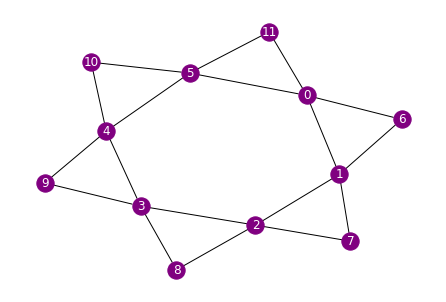

In [1]:
import numpy as np

from time import time

import matplotlib.pyplot as plt
import rustworkx as rx

plt.rcParams.update({"font.size": 16})

from qiskit_nature.second_q.hamiltonians.lattices import Lattice
from qiskit_nature.second_q.hamiltonians import HeisenbergModel
from qiskit_nature.second_q.mappers import LogarithmicMapper


# Custom Heisenberg couplings
import sys
sys.path.append(r'.')  # may be needed if running notebook on a cloud service
# Kagome unit cell
num_sites = 12
# Edge weight
t = 1.0

# Generate graph of kagome unit cell
# Start by defining all the edges
graph = rx.PyGraph(multigraph=False)
graph.add_nodes_from(range(num_sites))
edge_list = [
    (0, 1, t),
    (1, 2, t),
    (2, 3, t),
    (3, 4, t),
    (4, 5, t),
    (5, 0, t),
    (0, 6, t),
    (1, 6, t),
    (1, 7, t),
    (2, 7, t),
    (2, 8, t),
    (3, 8, t),
    (3, 9, t),
    (4, 9, t),
    (4, 10, t),
    (5, 10, t),
    (5, 11, t),
    (0, 11, t),
]
# Generate graph from the list of edges
graph.add_edges_from(edge_list)

# Make a Lattice from graph
kagome_unit_cell = Lattice(graph)

# Draw Lattice
kagome_unit_cell.draw(style={'with_labels':True,'font_color':'white','node_color':'purple'})
# plt.savefig('kagome_unit_cell.png')
plt.show()

In [2]:
from qiskit_nature.second_q.mappers import LogarithmicMapper
# Build Hamiltonian from graph edges
heis = HeisenbergModel(
    kagome_unit_cell,
    (1.7,1.0,1.3),  # same spin-spin interaction weight as used in graph
    (0.0,0.0,0.0),  # no external field
)

# The Lattice needs an explicit mapping to the qubit states.
# We map 1 qubit for 1 spin-1/2 particle using the LogarithmicMapper
log_mapper = LogarithmicMapper()
# Multiply by factor of 4 to account for (1/2)^2 terms from spin operators in the HeisenbergModel
ham = 4 * log_mapper.map(heis.second_q_op().simplify())
# Print Hamiltonian to check it's what we expect.
ham

PauliSumOp(SparsePauliOp(['IIIIIIIIIIXX', 'IIIIIIIIIIYY', 'IIIIIIIIIIZZ', 'IIIIIIIIIXXI', 'IIIIIIIIIYYI', 'IIIIIIIIIZZI', 'IIIIIIIIXXII', 'IIIIIIIIYYII', 'IIIIIIIIZZII', 'IIIIIIIXXIII', 'IIIIIIIYYIII', 'IIIIIIIZZIII', 'IIIIIIXXIIII', 'IIIIIIYYIIII', 'IIIIIIZZIIII', 'IIIIIIXIIIIX', 'IIIIIIYIIIIY', 'IIIIIIZIIIIZ', 'IIIIIXIIIIIX', 'IIIIIYIIIIIY', 'IIIIIZIIIIIZ', 'IIIIIXIIIIXI', 'IIIIIYIIIIYI', 'IIIIIZIIIIZI', 'IIIIXIIIIIXI', 'IIIIYIIIIIYI', 'IIIIZIIIIIZI', 'IIIIXIIIIXII', 'IIIIYIIIIYII', 'IIIIZIIIIZII', 'IIIXIIIIIXII', 'IIIYIIIIIYII', 'IIIZIIIIIZII', 'IIIXIIIIXIII', 'IIIYIIIIYIII', 'IIIZIIIIZIII', 'IIXIIIIIXIII', 'IIYIIIIIYIII', 'IIZIIIIIZIII', 'IIXIIIIXIIII', 'IIYIIIIYIIII', 'IIZIIIIZIIII', 'IXIIIIIXIIII', 'IYIIIIIYIIII', 'IZIIIIIZIIII', 'IXIIIIXIIIII', 'IYIIIIYIIIII', 'IZIIIIZIIIII', 'XIIIIIXIIIII', 'YIIIIIYIIIII', 'ZIIIIIZIIIII', 'XIIIIIIIIIIX', 'YIIIIIIIIIIY', 'ZIIIIIIIIIIZ'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j, 1.7+0.j, 1. +0.j, 1.3+0.j, 1.7+0.j, 1. +0.j,
 1.3+0.j, 1.7+0

In [3]:
from qiskit.algorithms import NumPyEigensolver
from qiskit.visualization import plot_histogram

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=3)
exact_result = exact_solver.compute_eigenvalues(ham)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)
dicti = exact_result.eigenstates[0].primitive.to_dict()
for key,value in list(dicti.items()):
    new = abs(dicti[key])*1000
    if new>1:
        dicti[key] = round(new)
        print("State:",key,"Coeff:",round(new,2))

    else:
        dicti[key] = 0
    

State: 000000111111 Coeff: 85.56
State: 000001111101 Coeff: 108.38
State: 000001111110 Coeff: 64.39
State: 000010111011 Coeff: 108.38
State: 000010111101 Coeff: 64.39
State: 000011111001 Coeff: 108.38
State: 000011111100 Coeff: 64.39
State: 000100110111 Coeff: 108.38
State: 000100111011 Coeff: 64.39
State: 000101110101 Coeff: 108.38
State: 000101111010 Coeff: 64.39
State: 000110110011 Coeff: 108.38
State: 000110111001 Coeff: 64.39
State: 000111110001 Coeff: 108.38
State: 000111111000 Coeff: 64.39
State: 001000101111 Coeff: 108.38
State: 001000110111 Coeff: 64.39
State: 001001101101 Coeff: 108.38
State: 001001110110 Coeff: 64.39
State: 001010101011 Coeff: 108.38
State: 001010110101 Coeff: 64.39
State: 001011101001 Coeff: 108.38
State: 001011110100 Coeff: 64.39
State: 001100100111 Coeff: 108.38
State: 001100110011 Coeff: 64.39
State: 001101100101 Coeff: 108.38
State: 001101110010 Coeff: 64.39
State: 001110100011 Coeff: 108.38
State: 001110110001 Coeff: 64.39
State: 001111100001 Coeff: 10

In [4]:
def singlet(circ,qs):
    circ.x(qs[1])
    circ.h(qs[0])
    circ.cx(qs[0],qs[1])
    circ.z(qs[1])
def singlet_all(circ, dimer_list):
    for dimer in dimer_list:
        singlet(circ,dimer)

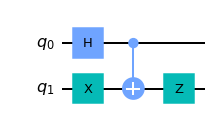

In [5]:
from qiskit.circuit import QuantumCircuit

circ = QuantumCircuit(2)
singlet(circ,[0,1])
circ.draw("mpl")

In [6]:
from qiskit.opflow import X, Y, Z
from sympy import *
from qiskit.circuit import Parameter

In [7]:
def singlet_all(circ, dimer_list):
    for dimer in dimer_list:
        singlet(circ,dimer)

In [8]:


qc = QuantumCircuit(12)
dimer = [(11,0),(6,1),(7,2),(8,3),(9,4),(10,5)]

In [9]:
singlet_all(qc,dimer)

In [10]:
qc.draw()

┌───┐┌───┐┌───┐                         
 q_0: ┤ X ├┤ X ├┤ Z ├─────────────────────────
      ├───┤└─┬─┘├───┤┌───┐                    
 q_1: ┤ X ├──┼──┤ X ├┤ Z ├────────────────────
      ├───┤  │  └─┬─┘├───┤┌───┐               
 q_2: ┤ X ├──┼────┼──┤ X ├┤ Z ├───────────────
      ├───┤  │    │  └─┬─┘├───┤┌───┐          
 q_3: ┤ X ├──┼────┼────┼──┤ X ├┤ Z ├──────────
      ├───┤  │    │    │  └─┬─┘├───┤┌───┐     
 q_4: ┤ X ├──┼────┼────┼────┼──┤ X ├┤ Z ├─────
      ├───┤  │    │    │    │  └─┬─┘├───┤┌───┐
 q_5: ┤ X ├──┼────┼────┼────┼────┼──┤ X ├┤ Z ├
      ├───┤  │    │    │    │    │  └─┬─┘└───┘
 q_6: ┤ H ├──┼────■────┼────┼────┼────┼───────
      ├───┤  │         │    │    │    │       
 q_7: ┤ H ├──┼─────────■────┼────┼────┼───────
      ├───┤  │              │    │    │       
 q_8: ┤ H ├──┼──────────────■────┼────┼───────
      ├───┤  │                   │    │       
 q_9: ┤ H ├──┼───────────────────■────┼───────
      ├───┤  │                        │       
q_10: ┤ H ├──┼────────────────────────■───────
      ├───┤  │                                
q_11: ┤ H ├──■────────────────────────────────
      └───┘

In [11]:
from qiskit.circuit.library import EfficientSU2

ent_list = []
for (q0,q1,w) in edge_list:
    ent_list.append((q0,q1))
    
ansatz = EfficientSU2(12, entanglement=ent_list, reps=3, skip_final_rotation_layer=True)

In [12]:
ansatz.decompose().draw()

┌──────────┐┌───────────┐                         ┌───┐          »
 q_0: ─┤ Ry(θ[0]) ├┤ Rz(θ[12]) ├──■──────────────────────┤ X ├──■───────»
       ├──────────┤├───────────┤┌─┴─┐                    └─┬─┘  │       »
 q_1: ─┤ Ry(θ[1]) ├┤ Rz(θ[13]) ├┤ X ├──■───────────────────┼────┼────■──»
       ├──────────┤├───────────┤└───┘┌─┴─┐                 │    │    │  »
 q_2: ─┤ Ry(θ[2]) ├┤ Rz(θ[14]) ├─────┤ X ├──■──────────────┼────┼────┼──»
       ├──────────┤├───────────┤     └───┘┌─┴─┐            │    │    │  »
 q_3: ─┤ Ry(θ[3]) ├┤ Rz(θ[15]) ├──────────┤ X ├──■─────────┼────┼────┼──»
       ├──────────┤├───────────┤          └───┘┌─┴─┐       │    │    │  »
 q_4: ─┤ Ry(θ[4]) ├┤ Rz(θ[16]) ├───────────────┤ X ├──■────┼────┼────┼──»
       ├──────────┤├───────────┤               └───┘┌─┴─┐  │    │    │  »
 q_5: ─┤ Ry(θ[5]) ├┤ Rz(θ[17]) ├────────────────────┤ X ├──■────┼────┼──»
       ├──────────┤├───────────┤                    └───┘     ┌─┴─┐┌─┴─┐»
 q_6: ─┤ Ry(θ[6]) ├┤ Rz(θ[18]) ├──────────────────────────────┤ X ├┤ X ├»
       ├──────────┤├───────────┤                              └───┘└───┘»
 q_7: ─┤ Ry(θ[7]) ├┤ Rz(θ[19]) ├────────────────────────────────────────»
       ├──────────┤├───────────┤                                        »
 q_8: ─┤ Ry(θ[8]) ├┤ Rz(θ[20]) ├────────────────────────────────────────»
       ├──────────┤├───────────┤                                        »
 q_9: ─┤ Ry(θ[9]) ├┤ Rz(θ[21]) ├────────────────────────────────────────»
      ┌┴──────────┤├───────────┤                                        »
q_10: ┤ Ry(θ[10]) ├┤ Rz(θ[22]) ├────────────────────────────────────────»
      ├───────────┤├───────────┤                                        »
q_11: ┤ Ry(θ[11]) ├┤ Rz(θ[23]) ├────────────────────────────────────────»
      └───────────┘└───────────┘                                        »
«                                                                    »
« q_0: ──────────────────────────────────────────────────────────────»
«                        ┌───────────┐┌───────────┐                  »
« q_1: ───────────────■──┤ Ry(θ[25]) ├┤ Rz(θ[37]) ├──────────────────»
«                     │  └───────────┘└───────────┘                  »
« q_2: ───────────────┼─────────────────────■─────────────────────■──»
«                     │                     │                     │  »
« q_3: ───────────────┼─────────────────────┼─────────────────────┼──»
«                     │                     │                     │  »
« q_4: ───────────────┼─────────────────────┼─────────────────────┼──»
«                     │                     │                     │  »
« q_5: ───────────────┼─────────────────────┼─────────────────────┼──»
«      ┌───────────┐  │  ┌───────────┐      │                     │  »
« q_6: ┤ Ry(θ[30]) ├──┼──┤ Rz(θ[42]) ├──────┼─────────────────────┼──»
«      └───────────┘┌─┴─┐└───────────┘    ┌─┴─┐    ┌───────────┐  │  »
« q_7: ─────────────┤ X ├─────────────────┤ X ├────┤ Ry(θ[31]) ├──┼──»
«                   └───┘                 └───┘    └───────────┘┌─┴─┐»
« q_8: ─────────────────────────────────────────────────────────┤ X ├»
«                                                               └───┘»
« q_9: ──────────────────────────────────────────────────────────────»
«                                                                    »
«q_10: ──────────────────────────────────────────────────────────────»
«                                                                    »
«q_11: ──────────────────────────────────────────────────────────────»
«                                                                    »
«                                                                            »
« q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                            »
« q_1: ──────────────────────────────────────────────────────────────────────»
«      ┌───────────┐┌───────────┐                                 

In [13]:
from math import factorial 

def comb(n,m):
    return factorial(n)//(factorial(n-m)*factorial(m))


In [14]:
from qiskit.circuit import Gate
class ParticleSym(Gate):
    def __init__(self,params,rev = True,label = None):
        
        self._rev = rev
        self._params = list(params)
        
        if self._rev:
            self._params[1] = 0
        super().__init__("A",2,self._params)
    
    def _define(self):
        q = QuantumRegister(2, "q")
        circ = QuantumCircuit(q,name = self.name)
        p = self._params[1]+np.pi
        t = self._params[0]+np.pi/2
        circ.cx(1,0)
        '''theta = 2*self._params[0]
        lam = self._params[1]+np.pi
        phi = -self._params[1]
        circ.cu(theta,phi,lam,0,0,1)
        '''
        circ.rz(-p,1)
        circ.ry(-t,1)
        circ.cx(0,1)
        circ.ry(t,1)
        circ.rz(p,1)
        circ.cx(1,0)
        self.definition = circ

In [15]:
ansatz_dimer = qc

In [16]:
ansatz_dimer.draw()

┌───┐┌───┐┌───┐                         
 q_0: ┤ X ├┤ X ├┤ Z ├─────────────────────────
      ├───┤└─┬─┘├───┤┌───┐                    
 q_1: ┤ X ├──┼──┤ X ├┤ Z ├────────────────────
      ├───┤  │  └─┬─┘├───┤┌───┐               
 q_2: ┤ X ├──┼────┼──┤ X ├┤ Z ├───────────────
      ├───┤  │    │  └─┬─┘├───┤┌───┐          
 q_3: ┤ X ├──┼────┼────┼──┤ X ├┤ Z ├──────────
      ├───┤  │    │    │  └─┬─┘├───┤┌───┐     
 q_4: ┤ X ├──┼────┼────┼────┼──┤ X ├┤ Z ├─────
      ├───┤  │    │    │    │  └─┬─┘├───┤┌───┐
 q_5: ┤ X ├──┼────┼────┼────┼────┼──┤ X ├┤ Z ├
      ├───┤  │    │    │    │    │  └─┬─┘└───┘
 q_6: ┤ H ├──┼────■────┼────┼────┼────┼───────
      ├───┤  │         │    │    │    │       
 q_7: ┤ H ├──┼─────────■────┼────┼────┼───────
      ├───┤  │              │    │    │       
 q_8: ┤ H ├──┼──────────────■────┼────┼───────
      ├───┤  │                   │    │       
 q_9: ┤ H ├──┼───────────────────■────┼───────
      ├───┤  │                        │       
q_10: ┤ H ├──┼────────────────────────■───────
      ├───┤  │                                
q_11: ┤ H ├──■────────────────────────────────
      └───┘

In [17]:
from qiskit.circuit import ParameterVector
from qiskit.circuit import QuantumRegister
a2 = []
for i in range(comb(num_sites,num_sites//2)):
    a2.append(ParameterVector("ß"+str(i),2))
mapping = [(11,5),(10,4),(9,3),(8,2),(7,1),(6,0),(11,0),(6,1),(7,2),(8,3),(9,4),(10,5)]

rounded = comb(num_sites,num_sites//2)//len(mapping)*len(mapping)
for i in range(rounded//12):
    ansatz_dimer.append(ParticleSym(a2[i]),mapping[i%len(mapping)]) 
ansatz_dimer.decompose().draw()

┌───────────┐                                         ┌───┐┌───────┐     »
 q_0: ┤ U3(π,0,π) ├─────────────────────────────────────────┤ X ├┤ U1(π) ├─────»
      ├───────────┤┌───┐┌───────┐                           └─┬─┘└───────┘     »
 q_1: ┤ U3(π,0,π) ├┤ X ├┤ U1(π) ├─────────────────────────────┼─────────────■──»
      ├───────────┤└─┬─┘└─┬───┬─┘┌───────┐                    │             │  »
 q_2: ┤ U3(π,0,π) ├──┼────┤ X ├──┤ U1(π) ├────────────────────┼─────────────┼──»
      ├───────────┤  │    └─┬─┘  └─┬───┬─┘┌───────┐           │             │  »
 q_3: ┤ U3(π,0,π) ├──┼──────┼──────┤ X ├──┤ U1(π) ├───────────┼─────────────┼──»
      ├───────────┤  │      │      └─┬─┘  └─┬───┬─┘┌───────┐  │             │  »
 q_4: ┤ U3(π,0,π) ├──┼──────┼────────┼──────┤ X ├──┤ U1(π) ├──┼─────────────┼──»
      ├───────────┤  │      │        │      └─┬─┘  └─┬───┬─┘  │  ┌───────┐  │  »
 q_5: ┤ U3(π,0,π) ├──┼──────┼────────┼────────┼──────┤ X ├────┼──┤ U1(π) ├──┼──»
      └┬─────────┬┘  │      │        │        │      └─┬─┘    │  └───────┘  │  »
 q_6: ─┤ U2(0,π) ├───■──────┼────────┼────────┼────────┼──────┼─────────────┼──»
       ├─────────┤          │        │        │        │      │           ┌─┴─┐»
 q_7: ─┤ U2(0,π) ├──────────■────────┼────────┼────────┼──────┼───────────┤ X ├»
       ├─────────┤                   │        │        │      │           └───┘»
 q_8: ─┤ U2(0,π) ├───────────────────■────────┼────────┼──────┼────────────────»
       ├─────────┤                            │        │      │                »
 q_9: ─┤ U2(0,π) ├────────────────────────────■────────┼──────┼────────────────»
       ├─────────┤                                     │      │                »
q_10: ─┤ U2(0,π) ├─────────────────────────────────────■──────┼────────────────»
       ├─────────┤                                            │                »
q_11: ─┤ U2(0,π) ├────────────────────────────────────────────■────────────────»
       └─────────┘                                                             »
«                                                                     »
« q_0: ────────────────────────────────────────────────────────────■──»
«      ┌────────┐┌──────────────────────┐                          │  »
« q_1: ┤ Rz(-π) ├┤ Ry(-1.0*ß4[0] - π/2) ├──────────────────────────┼──»
«      └────────┘└──────┬────────┬──────┘┌──────────────────────┐  │  »
« q_2: ────■────────────┤ Rz(-π) ├───────┤ Ry(-1.0*ß3[0] - π/2) ├──┼──»
«          │            └────────┘       └──────┬────────┬──────┘  │  »
« q_3: ────┼────────────────■───────────────────┤ Rz(-π) ├─────────┼──»
«          │                │                   └────────┘         │  »
« q_4: ────┼────────────────┼───────────────────────■──────────────┼──»
«          │                │                       │              │  »
« q_5: ────┼────────────────┼───────────────────────┼──────────────┼──»
«          │                │                       │            ┌─┴─┐»
« q_6: ────┼────────────────┼───────────────────────┼────────────┤ X ├»
«          │                │                       │            └───┘»
« q_7: ────┼────────────────┼───────────────────────┼─────────────────»
«        ┌─┴─┐              │                       │                 »
« q_8: ──┤ X ├──────────────┼───────────────────────┼─────────────────»
«        └───┘            ┌─┴─┐                     │                 »
« q_9: ───────────────────┤ X ├─────────────────────┼─────────────────»
«                         └───┘                   ┌─┴─┐               »
«q_10: ───────────────────────────────────────────┤ X ├───────────────»
«                                                 └───┘               »
«q_11: ───────────────────────────────────────────────────────────────»
«                                                                     »
«             ┌────────┐       ┌──────────────────────┐                        »
« q_0: ───────┤ Rz(-π) ├───────┤ Ry(-1.0*ß5[0] - π/2) ├────────────────────────»
«             └────

In [18]:
ansatz_dimer.draw()

┌───┐┌───┐┌───┐                                                       »
 q_0: ┤ X ├┤ X ├┤ Z ├───────────────────────────────────────────────────────»
      ├───┤└─┬─┘├───┤┌───┐                                                  »
 q_1: ┤ X ├──┼──┤ X ├┤ Z ├──────────────────────────────────────────────────»
      ├───┤  │  └─┬─┘├───┤┌───┐                                             »
 q_2: ┤ X ├──┼────┼──┤ X ├┤ Z ├─────────────────────────────────────────────»
      ├───┤  │    │  └─┬─┘├───┤┌───┐                                        »
 q_3: ┤ X ├──┼────┼────┼──┤ X ├┤ Z ├────────────────────────────────────────»
      ├───┤  │    │    │  └─┬─┘├───┤┌───┐                    ┌─────────────┐»
 q_4: ┤ X ├──┼────┼────┼────┼──┤ X ├┤ Z ├────────────────────┤1            ├»
      ├───┤  │    │    │    │  └─┬─┘├───┤┌───┐┌─────────────┐│             │»
 q_5: ┤ X ├──┼────┼────┼────┼────┼──┤ X ├┤ Z ├┤1            ├┤             ├»
      ├───┤  │    │    │    │    │  └─┬─┘└───┘│             ││             │»
 q_6: ┤ H ├──┼────■────┼────┼────┼────┼───────┤             ├┤             ├»
      ├───┤  │         │    │    │    │       │             ││             │»
 q_7: ┤ H ├──┼─────────■────┼────┼────┼───────┤             ├┤  A(ß1[0],0) ├»
      ├───┤  │              │    │    │       │             ││             │»
 q_8: ┤ H ├──┼──────────────■────┼────┼───────┤  A(ß0[0],0) ├┤             ├»
      ├───┤  │                   │    │       │             ││             │»
 q_9: ┤ H ├──┼───────────────────■────┼───────┤             ├┤             ├»
      ├───┤  │                        │       │             ││             │»
q_10: ┤ H ├──┼────────────────────────■───────┤             ├┤0            ├»
      ├───┤  │                                │             │└─────────────┘»
q_11: ┤ H ├──■────────────────────────────────┤0            ├───────────────»
      └───┘                                   └─────────────┘               »
«                                                   ┌─────────────┐»
« q_0: ─────────────────────────────────────────────┤1            ├»
«                                    ┌─────────────┐│             │»
« q_1: ──────────────────────────────┤1            ├┤             ├»
«                     ┌─────────────┐│             ││             │»
« q_2: ───────────────┤1            ├┤             ├┤             ├»
«      ┌─────────────┐│             ││             ││             │»
« q_3: ┤1            ├┤             ├┤             ├┤  A(ß5[0],0) ├»
«      │             ││             ││             ││             │»
« q_4: ┤             ├┤             ├┤  A(ß4[0],0) ├┤             ├»
«      │             ││             ││             ││             │»
« q_5: ┤             ├┤  A(ß3[0],0) ├┤             ├┤             ├»
«      │             ││             ││             ││             │»
« q_6: ┤  A(ß2[0],0) ├┤             ├┤             ├┤0            ├»
«      │             ││             ││             │└─────────────┘»
« q_7: ┤             ├┤             ├┤0            ├───────────────»
«      │             ││             │└─────────────┘               »
« q_8: ┤             ├┤0            ├──────────────────────────────»
«      │             │└─────────────┘                              »
« q_9: ┤0            ├─────────────────────────────────────────────»
«      └─────────────┘                                             »
«q_10: ────────────────────────────────────────────────────────────»
«                                                                  »
«q_11: ────────────────────────────────────────────────────────────»
«                                                                  »
«      ┌─────────────┐                                             »
« q_0: ┤1            ├─────────────────────────────────────────────»
«      │             │┌─────────────┐                              »
« q_1: ┤             ├┤1            ├──────────────────────────────»
«      │             ││             │┌─────────────┐   

In [19]:
from math import ceil,floor
# Define a simple callback function
def callback(value):
        intermediate_info.append(value)

In [20]:
from qiskit.quantum_info import SparsePauliOp
def ZString(n,j):
    string = ["I"]*(j-1)+["Z"]+["I"]*(n-j)
    pauli = SparsePauliOp.from_list([(''.join(string),1)])
    return pauli

In [21]:
def TotalSpin(n):
    for i in range(1,n+1):
        if i == 1:
            op = ZString(n,i)
        else:
            op += ZString(n,i)
    return op
print(TotalSpin(12))   

SparsePauliOp(['ZIIIIIIIIIII', 'IZIIIIIIIIII', 'IIZIIIIIIIII', 'IIIZIIIIIIII', 'IIIIZIIIIIII', 'IIIIIZIIIIII', 'IIIIIIZIIIII', 'IIIIIIIZIIII', 'IIIIIIIIZIII', 'IIIIIIIIIZII', 'IIIIIIIIIIZI', 'IIIIIIIIIIIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j])


In [22]:
from qiskit.algorithms import MinimumEigensolver, VQEResult
from qiskit.opflow import (
    CircuitSampler,
    CircuitStateFn,
    ExpectationBase,
    ExpectationFactory,
    ListOp,
    OperatorBase,
    PauliSumOp,
    StateFn,
)
from typing import Union, List, Dict

# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class CustomVQE(MinimumEigensolver):
    
    def __init__(self, estimator, circuit, optimizer, callback=None, initial_point = None, sym = True):
        self._estimator = estimator
        self.ansatz = circuit
        self._optimizer = optimizer
        self._callback = callback
        self._initial_point = initial_point
        backend = Aer.get_backend("statevector_simulator")
        self._circuit_sampler = CircuitSampler(
            backend
        )
        self._sym = sym
     
    def _get_eigenstate(self, optimal_parameters) -> Union[List[float], Dict[str, int]]:
        """Get the simulation outcome of the ansatz, provided with parameters."""
        optimal_circuit = self.ansatz.bind_parameters(optimal_parameters)
        state_fn = self._circuit_sampler.convert(StateFn(optimal_circuit)).eval()
        state = state_fn.primitive.data  # VectorStateFn -> Statevector -> np.array
        return state
    
    
    def compute_minimum_eigenvalue(self, operators, aux_operators=None):    
        num = 0
        # Define objective function to classically minimize over
        def objective(x, shots = None):
            #adjust number of shots
            # Execute job with estimator primitive
            if shots is not None:
                shots = int(shots)
                self._estimator.set_options(shots = shots)
            else:
                self._estimator.set_options(shots = 1024)
            job = self._estimator.run([self.ansatz], [operators], [x])
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            if self._sym:
                spinop = TotalSpin(self.ansatz.num_qubits)
                job_sym = self._estimator.run([self.ansatz], [spinop], [x])
                est_result_sym = job_sym.result()
                value_sym = est_result_sym.values[0]
                value += 0.5*(value_sym)**2
            # Save result information using callback function
            if self._callback is not None:
                self._callback(value)
            if isinstance(self._optimizer,iCans):
                var = est_result.metadata[0]['variance']
                return value,var
            else:
                return value
            
        # Select an initial point for the ansatzs' parameters
        if self._initial_point is None:  
            x0 = np.pi/4 * np.random.rand(self.ansatz.num_parameters)
        else:
            x0 = self._initial_point
        # Run optimization
        if isinstance(self._optimizer, iCans):
            self._optimizer.Lipschitz(operators)
        res = self._optimizer.minimize(objective, x0=x0)
        
        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nit
        result.eigenvalue = res.fun[0]
        result.optimal_parameters = res.x
        result.eigenstate = self._get_eigenstate(result.optimal_parameters)
        
        return result

In [23]:
from qiskit.primitives import Estimator
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit import Aer

#optimizer = SPSA(maxiter = 400)
optimizer = COBYLA(maxiter = 2000)
estimator = Estimator([ansatz_dimer], [ham])
custom_vqe = CustomVQE(estimator, ansatz_dimer, optimizer, callback=callback, sym = False)

In [263]:
from time import time
intermediate_info = []
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 2000,
    'eigenstate': array([-6.56280211e-18-1.18784216e-32j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -3.69232702e-19-4.15531304e-33j]),
    'eigenvalue': -16.529859647225223,
    'optimal_circuit': None,
    'optimal_parameters': array([ 0.01243403,  0.01073016, -0.01062593,  0.04647895,  0.02774149,
       -0.4874236 ,  0.78376939,  0.0020216 ,  0.73791521, -0.76009936,
        0.78848274,  0.0477803 ,  0.21720706,  0.20958906,  0.1015963 ,
        0.73630619,  0.44166806, -0.09538479,  0.61737029, -0.11558091,
        0.00465542,  0.25944921,  0.83174413,  0.08859871, -0.23166048,
        0.21656555,  0.33956716, -0.15006237, -0.16597241,  0.06258628,
        0.30779624,  0.4101981 , -0.8216797 ,  0.39644815,  0.20320788,
       -0.17290995,  0.06724742, -0.03745976, -0.07968986, -0.64565773,
       -

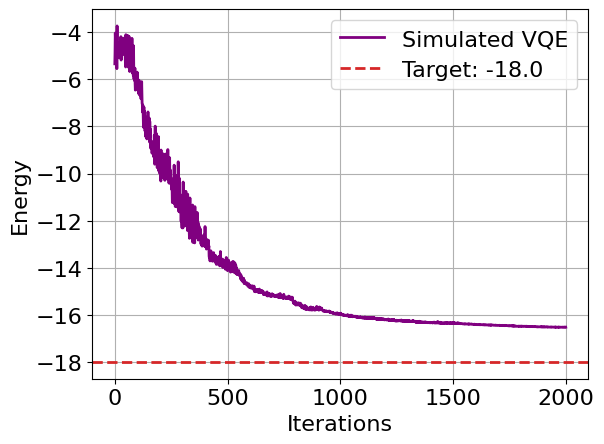

In [264]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

# HVA

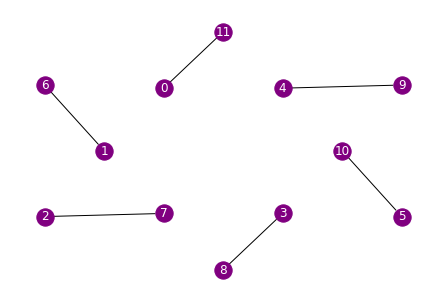

In [24]:
graph_dimer = rx.PyGraph(multigraph=False)
graph_dimer.add_nodes_from(range(num_sites))
dimer_list = [
    (1, 6, t),
    (2, 7, t),
    (3, 8, t),
    (4, 9, t),
    (5, 10, t),
    (0, 11, t),
]
# Generate graph from the list of edges
graph_dimer.add_edges_from(dimer_list)

# Make a Lattice from graph
dimer_covering = Lattice(graph_dimer)
kagome_pos = {0:[-0.6,5], 1:[-1.2,3], 3:[0.6,1], 7:[-0.6,1], 
              10:[1.2,3], 8:[0,-0.8], 4:[0.6,5], 2:[-1.8,0.9], 
              6:[-1.8,5.1], 11:[0,6.8], 5:[1.8,0.9], 9:[1.8,5.1]}
# Draw Lattice
dimer_covering.draw(style={'with_labels':True,'font_color':'white','node_color':'purple','pos':kagome_pos})
# plt.savefig('kagome_unit_cell.png')
plt.show()


In [25]:
from qiskit_nature.second_q.mappers import LogarithmicMapper
# Build Hamiltonian from graph edges
heis_dimer = HeisenbergModel(
    dimer_covering,
    (1.0,1.0,1.0),  # same spin-spin interaction weight as used in graph
    (0.0,0.0,0.0),  # no external field
)

# The Lattice needs an explicit mapping to the qubit states.
# We map 1 qubit for 1 spin-1/2 particle using the LogarithmicMapper
log_mapper = LogarithmicMapper()
# Multiply by factor of 4 to account for (1/2)^2 terms from spin operators in the HeisenbergModel
ham_dimer = 4 * log_mapper.map(heis_dimer.second_q_op().simplify())
# Print Hamiltonian to check it's what we expect.
ham_dimer

PauliSumOp(SparsePauliOp(['IIIIIXIIIIXI', 'IIIIIYIIIIYI', 'IIIIIZIIIIZI', 'IIIIXIIIIXII', 'IIIIYIIIIYII', 'IIIIZIIIIZII', 'IIIXIIIIXIII', 'IIIYIIIIYIII', 'IIIZIIIIZIII', 'IIXIIIIXIIII', 'IIYIIIIYIIII', 'IIZIIIIZIIII', 'IXIIIIXIIIII', 'IYIIIIYIIIII', 'IZIIIIZIIIII', 'XIIIIIIIIIIX', 'YIIIIIIIIIIY', 'ZIIIIIIIIIIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]), coeff=1)

In [26]:
edge_terms = []
for i in range(0,len(ham),3):
    for j in range(3):
        if j == 0:
            temp = ham[i]
        else:
            temp+=ham[i+j]
    edge_terms.append(temp)

In [27]:
print(edge_terms)

[PauliSumOp(SparsePauliOp(['IIIIIIIIIIXX', 'IIIIIIIIIIYY', 'IIIIIIIIIIZZ'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j]), coeff=1), PauliSumOp(SparsePauliOp(['IIIIIIIIIXXI', 'IIIIIIIIIYYI', 'IIIIIIIIIZZI'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j]), coeff=1), PauliSumOp(SparsePauliOp(['IIIIIIIIXXII', 'IIIIIIIIYYII', 'IIIIIIIIZZII'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j]), coeff=1), PauliSumOp(SparsePauliOp(['IIIIIIIXXIII', 'IIIIIIIYYIII', 'IIIIIIIZZIII'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j]), coeff=1), PauliSumOp(SparsePauliOp(['IIIIIIXXIIII', 'IIIIIIYYIIII', 'IIIIIIZZIIII'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j]), coeff=1), PauliSumOp(SparsePauliOp(['IIIIIIXIIIIX', 'IIIIIIYIIIIY', 'IIIIIIZIIIIZ'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j]), coeff=1), PauliSumOp(SparsePauliOp(['IIIIIXIIIIIX', 'IIIIIYIIIIIY', 'IIIIIZIIIIIZ'],
              coeffs=[1.7+0.j, 1. +0.j, 1.3+0.j]), coeff=1), PauliSumOp(SparsePauliOp(['IIIIIXIIIIXI', 'IIII

In [28]:
from qiskit.opflow import PauliTrotterEvolution
class VHA:
    
    def __init__(self,d,h0,h,num_qubits,div = None):
        self.d = d
        self.h0 = h0
        self.h = h
        self.num_qubits = num_qubits
        if div is None:
            self._reps = len(self.h)
        else:
            self._reps = len(self.h)//div
        self._params = {0:ParameterVector("θ_0",self.d),1:ParameterVector("θ_1",self.d*self._reps)}
    
    def singlet(circ,qs):
        circ.x(qs[1])
        circ.h(qs[0])
        circ.cx(qs[0],qs[1])
        circ.z(qs[1])
    
    def singlet_all(circ, dimer_list):
        for dimer in dimer_list:
            singlet(circ,dimer)
            
    def target_product(self,j):
        start = j*self._reps
        circ = QuantumCircuit(self.num_qubits)
        for k,term in enumerate(self.h):
            evop = PauliTrotterEvolution().convert((self._params[1][start+k%self._reps]*term).exp_i())
            circ.append(evop,[q for q in range(self.num_qubits)])
        return circ
    
    def exp0(self,j):
        circ = QuantumCircuit(self.num_qubits)
        evop = PauliTrotterEvolution().convert((self._params[0][j]*self.h0).exp_i())
        circ.append(evop,[q for q in range(self.num_qubits)])
        return circ
    
    def psi0(self,qc = None, is_dimer = True, dimer_list = []):
        if qc is None and is_dimer:
            circ = QuantumCircuit(self.num_qubits)
            singlet_all(circ,dimer_list)
            return circ
        return qc
    
    def form(self, dimer_list = []):
        circ = QuantumCircuit(self.num_qubits)
        circ.append(self.psi0(dimer_list = dimer_list),[q for q in range(self.num_qubits)])
        for j in range(self.d):
            circ.append(self.target_product(j),[q for q in range(self.num_qubits)])
            circ.append(self.exp0(j),[q for q in range(self.num_qubits)])
        return circ
            
    

In [29]:
ansatz_gen = VHA(2,ham_dimer,ham,num_sites, div = 1)
ansatzVHA = ansatz_gen.form(dimer)

In [30]:
ansatzVHA.draw()

┌───────────────┐»
 q_0: ┤0              ├»
      │               │»
 q_1: ┤1              ├»
      │               │»
 q_2: ┤2              ├»
      │               │»
 q_3: ┤3              ├»
      │               │»
 q_4: ┤4              ├»
      │               │»
 q_5: ┤5              ├»
      │   circuit-338 │»
 q_6: ┤6              ├»
      │               │»
 q_7: ┤7              ├»
      │               │»
 q_8: ┤8              ├»
      │               │»
 q_9: ┤9              ├»
      │               │»
q_10: ┤10             ├»
      │               │»
q_11: ┤11             ├»
      └───────────────┘»
«      ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
« q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                     ├»
«      │                                                                                                                                                                                                                                                                                                                                                                                                                                                      │»
« q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                     ├»
«      │                                                                                                                                                                                                                                                                                                                                                                                                                                                      │»
« q_2: ┤2                                                                                                                                                                                                                                                                                                                                                                                                                                                     ├»
«      │                                                                                                                                                                                                                                                                                                                                                                                                                                                      │»
« q_3: ┤3                                                                                                                                                                                                                                     

In [37]:
optimizer = COBYLA(maxiter = 2000)
estimator = Estimator([ansatzVHA], [ham])
custom_vqe = CustomVQE(estimator, ansatzVHA, optimizer, callback=callback, sym = False)

In [ ]:
from time import time
intermediate_info = []
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')

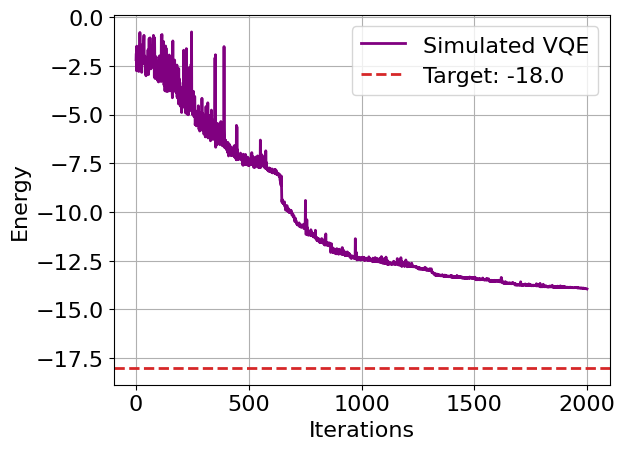

In [293]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [161]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

In [193]:
outer_list = dimer + [(6,0),(11,4),(9,10),(5,3),(8,7),(2,1)]

In [194]:
print(outer_list)

[(11, 0), (6, 1), (7, 2), (8, 3), (9, 4), (10, 5), (6, 0), (11, 4), (9, 10), (5, 3), (8, 7), (2, 1)]


In [ ]:
from random import shuffle

outer_terms = []
inner_terms = []
for i in range(0,len(ham),3):
    outer = False
    inds = find_indices(ham[i].primitive.to_list()[0][0],"X")
    tp = (inds[0],inds[1])
    print(tp)
    print(outer_list)
    if tp in outer_list or (tp[1],tp[0]) in outer_list:
        outer = True
    for j in range(3):
        if j == 0:
            temp = ham[i]
        else:
            temp+=ham[i+j]
    if outer:
        outer_terms.append(temp)
    else:
        inner_terms.append(temp)

shuffle(outer_terms)
shuffle(inner_terms)
print(outer_terms)
o1 = outer_terms[0:len(outer_terms)//3]
o2 = outer_terms[len(outer_terms)//3:2*len(outer_terms)//3]
o3 = outer_terms[2*len(outer_terms)//3:]
i1 = inner_terms[0:len(inner_terms)//3]
i2 = inner_terms[len(inner_terms)//3:2*len(inner_terms)//3]
i3 = inner_terms[2*len(inner_terms)//3:]
terms = [sum(o1),sum(o2),sum(o3),sum(i1),sum(i2),sum(i3)]

In [ ]:
ansatz_gen1 = VHA(12,ham_dimer,terms,num_sites, div = 1)
ansatzVHA1 = ansatz_gen1.form(dimer_list)
ansatzVHA1.draw()

In [213]:
optimizer = COBYLA(maxiter = 1000)
estimator = Estimator([ansatzVHA1], [ham])
custom_vqe = CustomVQE(estimator, ansatzVHA1, optimizer, callback=callback)

In [214]:
from time import time
intermediate_info = []
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 1000,
    'eigenstate': array([-9.21291022e-49+6.23944546e-49j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -1.62253715e-49+6.30368234e-50j]),
    'eigenvalue': -12.293276673231874,
    'optimal_circuit': None,
    'optimal_parameters': array([ 1.40421878,  0.51558763,  0.5271371 ,  1.77177189,  0.56936013,
        0.12936688,  0.14301157,  0.2406245 ,  1.41410682,  0.41667327,
        0.22584337,  0.55685134,  0.77441616,  0.14774722,  0.73956831,
        0.71886245,  0.71239279,  0.70408551,  0.43809348,  0.69169993,
        0.10119521,  0.57174958,  0.71067726,  0.4327267 ,  0.22396146,
        0.56337021,  0.70581311,  0.3082918 ,  0.7551946 ,  0.69993728,
        0.1656893 ,  0.48817815,  0.32056739,  0.1631358 ,  1.15960416,
        0.36340997,  0.66002773,  0.20213864,  0.05096935,  0.2808387 ,
        

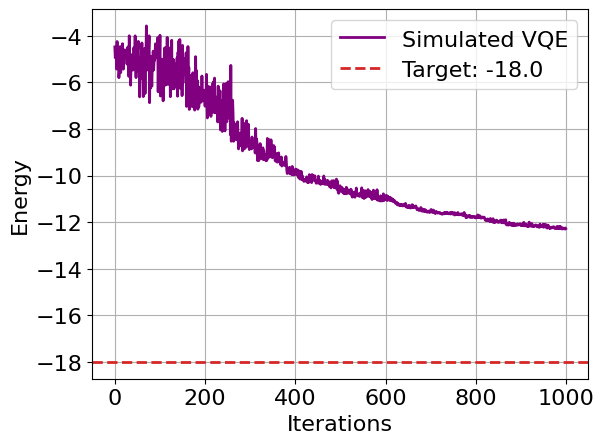

In [215]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

# iCans

In [36]:
import numpy as np
from math import ceil
from qiskit.algorithms.optimizers import Optimizer, OptimizerResult
from typing import Iterator, Optional, Union, Callable, Tuple, Dict, List, Any
from qiskit.opflow.primitive_ops import PauliSumOp
from qiskit.quantum_info import SparsePauliOp
from random import sample
from tqdm import tqdm

class iCans:
    
    def __init__(self,N, batch = None, cap: float = 0.5, delta: float = 1.0, L: float = None, learning_rate: float = 0.1, beta: float = 0.602, mu: float = 0.99,b: float = 10**(-6),s_min: int = 128,num: int = 1):
        self.num = num
        self._max_evals_grouped = 1
        self._nfev = 0
        self.L = L
        self.alpha = learning_rate
        self.mu = mu
        self.b = b
        self.nb = batch
        self.s_min = s_min
        self.delta = delta
        self.N = N
        self.beta = beta
        self.dom = cap
        self.perm_history = {}
     
    def Lipschitz(self, op: Union[PauliSumOp,SparsePauliOp]):
        #print("start")
        if isinstance(op,PauliSumOp):
            op = op.primitive
        self.L = sum(np.abs(op.coeffs))
        if self.alpha>2/self.L:
            #print("problem")
            self.alpha = 1/self.L
        

    def _evaluate_gradient(self, i, fun, point, shots): #requires a function returning two values: one variance, one gradient
        #and takes shots also as an input
        d = len(point)
        e_i = np.zeros(d)
        e_i[i] = 1
        pf = point + self.delta/2*e_i
        pb = point - self.delta/2*e_i
        gf, varf = fun(pf, shots)
        gb, varb = fun(pb, shots)
        #print("At point",i,"the forward is",gf,"the backward is",gb)
        self._nfev += 2
        est_gradient = (gf-gb)/self.delta
        #print("The gradient is",est_gradient,"\n")
        est_var = varf + varb #assuming two estimations are independent
        return est_gradient, est_var
    
    def _evaluate_gradient_r(self, i, fun, point, shots, points): #requires a function returning two values: one variance, one gradient
        #and takes shots also as an input
        d = len(point)
        dp = len(points)
        e_i = np.zeros(d)
        bool_i = 0
        for j in range(len(points)):
            if points[j]==i:
                e_i[i] = self.dom
                bool_i = 1
            else:
                rand_set = constRandom(1-self.dom,dp-1)
                e_i[points[j]] = rand_set[j-bool_i]
        #print("The random direction is",e_i)
        pf = point + self.delta/2*e_i
        pb = point - self.delta/2*e_i
        gf, varf = fun(pf, shots)
        gb, varb = fun(pb, shots)
        #print("At point",i,"the forward is",gf,"the backward is",gb)
        self._nfev += 2
        est_gradient = (gf-gb)/self.delta
        #print("The gradient is",est_gradient,"\n")
        est_var = varf + varb #assuming two estimations are independent
        return est_gradient, est_var
        
        
    def iEvaluate(self,points,fun,theta,s,random: int = 0):
        d = len(theta)
        g = np.zeros(d)
        S = np.zeros(d)
        for i in points:
            if random == 0:
                g_i,var_i = self._evaluate_gradient(i, fun, theta, s[i])
            else:
                g_i,var_i = self._evaluate_gradient_r(i, fun, theta, s[i],points)
            g[i] = g_i
            S[i] = var_i
            
        return g,S
        
    def optimize(self, fun, theta_0):
        theta = theta_0
        if self.nb is None:
            self.nb = len(theta_0)
        s_tot = 0
        d = len(theta)
        list_d = [i for i in range(d)]
        s = np.transpose([self.s_min]*d)
        chi_p = np.transpose([0]*d)
        xi_p = np.transpose([0]*d)
        k = 0
        alpha = self.alpha
        perm = []
        #pbar = tqdm(total = self.N)
        while s_tot<self.N:
            if k>0:
                perm = sample(list_d,self.nb)
                #print("Permutation is",perm,"\n")
            else:
                perm = list_d
                '''
            perm = list_d[self.nb*k:self.nb*(k+1)]'''
            self.perm_history[k]=perm
            gama = np.transpose([0]*d)
            g, S = self.iEvaluate(perm,fun,theta,s)
            summ = 0
            for i in perm:
                summ += s[i]
            #print("Gradient:",g,"\nVariance:",S,"\nChi':",max(chi_p),"\nXi':",max(xi_p),"\nChi:",max(chi),"\nXi:",max(xi),"\nk:",k,"\n------------------------------------------------------------\n")
            s_tot = s_tot + 2*summ
            #pbar.update(s_tot)
            print(s)
            chi_p = self.mu*chi_p + (1-self.mu)*g
            #print("Shots are",S)
            xi_p = self.mu*xi_p + (1-self.mu)*S
            xi = xi_p/(1-self.mu**(k+1))
            chi = chi_p/(1-self.mu**(k+1))
            #alpha = self.alpha/(1+k)**self.beta
            #print("New Learning Rate:",alpha)
            #print("Gradient:",g,"\nVariance:",S)
            for i in perm:
                if self.num == 1:
                    theta[i] = theta[i]-alpha*g[i]
                elif self.num == 2:
                    if alpha<=g[i]**2/(self.L*(g[i]**2+S[i]/s[i]+self.b*self.mu**k)):
                        #print("Regular Way\n")
                        theta[i] = theta[i]-alpha*g[i]
                    else:
                        #print("Other Way\n")
                        alpha_p = g[i]**2/(self.L*(g[i]**2+S[i]/s[i]+self.b*self.mu**k))
                        theta[i] = theta[i]-alpha_p*g[i]
                #print(xi)
                s[i] = min(max(ceil(2*self.L*alpha/(2-self.L*alpha)*xi[i]/(chi[i]**2+self.b*self.mu**k)),self.s_min),8192)
                #print(s[i])
                gama[i] = 1/s[i]*((alpha-self.L*alpha**2/2)*chi[i]**2-self.L*alpha**2/(2*s[i])*xi[i])
            int_res, int_var = fun(theta, 1024)
            intermediate_info_a.append(int_res)
            #pbar.close()
            s_max = s[np.argmax(gama)]
            s = np.clip(s,self.s_min,s_max)
            #if k%10 == 0:
                #print("Iter 10x")
            print("The function at this point is", int_res)
            print(s_tot,"used\n",self.N-s_tot,"left\n------------------------------------------")
            k += 1

        return k,theta
    
    def minimize(
        self,
        fun: Callable[[np.ndarray], float],
        x0: List,
    ) -> OptimizerResult:
        result = OptimizerResult()
        k, x= self.optimize(fun,x0)
        result.x = x
        result.fun = fun(x)
        result.nfev = self._nfev
        result.nit = k
        return result

In [65]:
opt = iCans(5*10**7,num = 2, delta = 0.55
            , learning_rate = 0.1, batch = 12)

In [66]:
from qiskit.primitives import Estimator
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit import Aer

#optimizer = SPSA(maxiter = 400)
estimator = Estimator([ansatz_dimer], [ham])
custom_vqe = CustomVQE(estimator, ansatz_dimer, opt, callback=callback, sym = True)

In [67]:
from time import time
intermediate_info = []
intermediate_info_a = []
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')

[128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128]
The function at this point is -5.414421140325278
19712 used
 49980288 left
------------------------------------------
[128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128]
The function at this point is -5.682734636405225
22784 used
 49977216 left
------------------------------------------
[128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 12

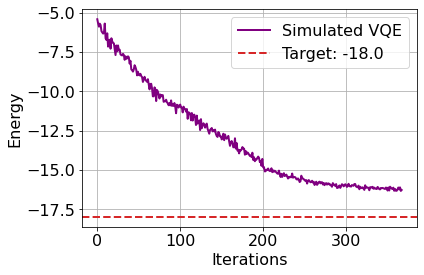

In [68]:
plt.plot(intermediate_info_a, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()